In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# La régréssion non linèaire
## 1. Introduction
La figure ci-dessous presente le prix de vente d'un ordinateur utilisé, acheté neuf à 4800dh.
#### Question:  Peut-t-on prédire le prix de cet ordinateur après 10ans d'utilisation on utilisant la régréssion linèaire simple?
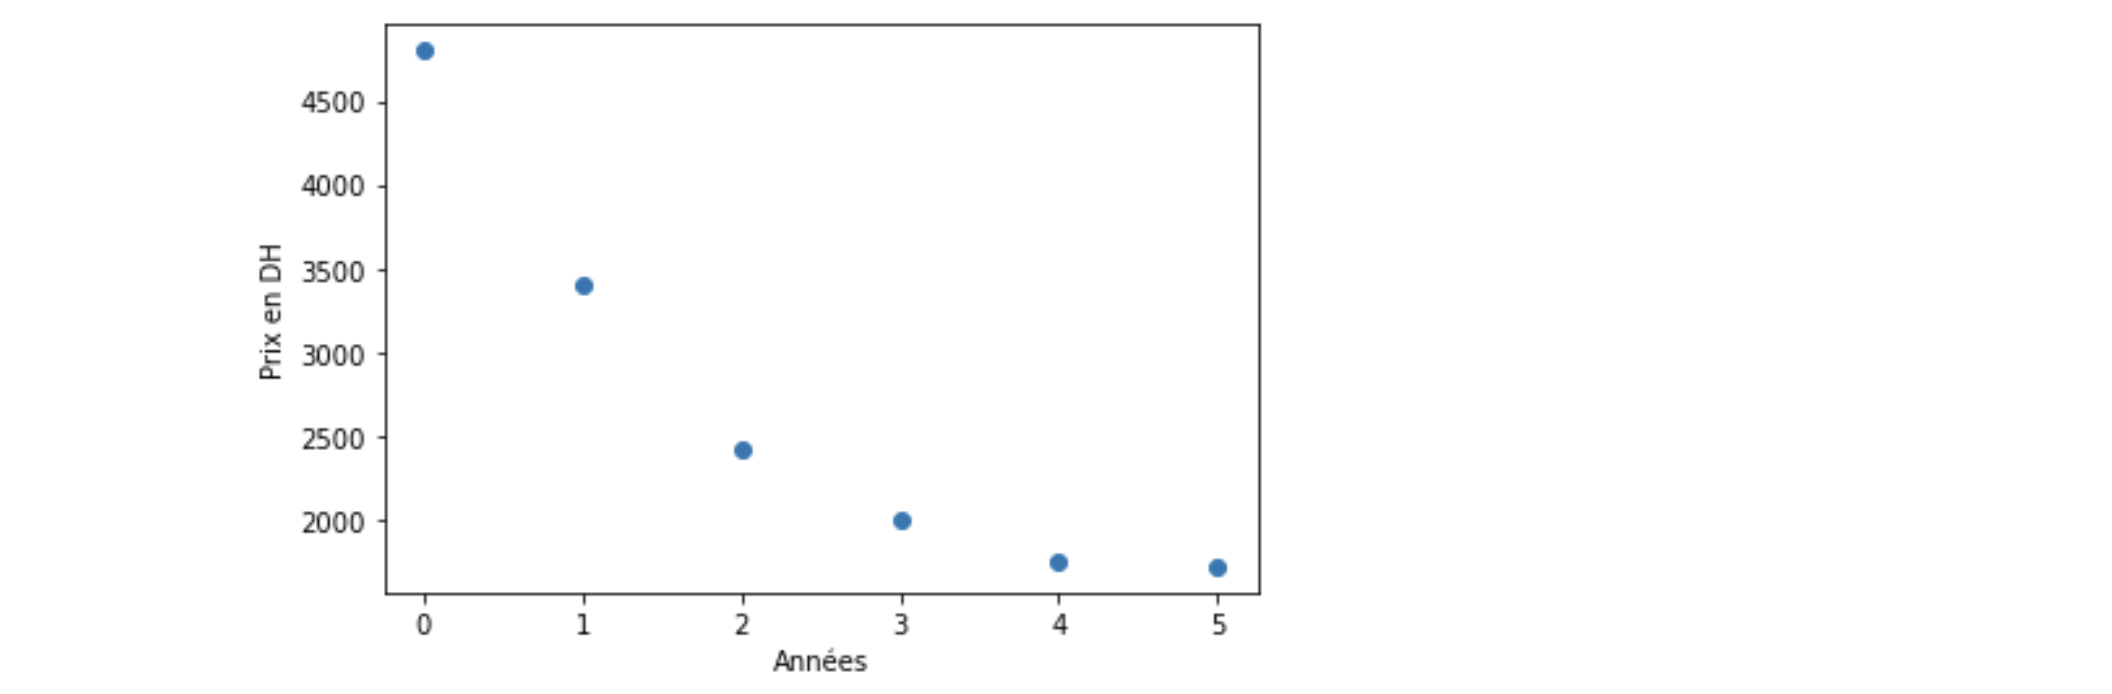
#### Réponse : Non, car d'après la figure, le prix n'est pas proportionel au nombre d'années d'utilisation 
D'ou la nécessité d'utilisation d'autres type de fonction Hypothèse comme l'exponentielle, la puisance le logarithme

## 1. Hypothèse exponentielle
$y=be^{ax}$

$ln(y)=ln(be^{ax})$

$ln(y)=ln(b)+ax$

On pose $Y=ln(y)$ et $B=ln(b)$

$Y=ax+B$

In [144]:
x=np.linspace

            x         y       lny
x    1.000000 -0.942545 -0.972007
y   -0.942545  1.000000  0.989408
lny -0.972007  0.989408  1.000000
[ 8.36721777 -0.11320037]


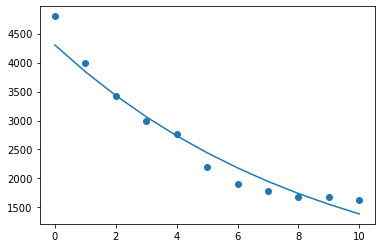

In [153]:
x=np.array([0.001,1,2,3,4,5,6,7,8,9,10])
y=np.array([4800,4000,3420,3000,2760,2200,1900, 1790,1680,1675,1620])
#Calculer la matrice de corrélation
data=pd.DataFrame([x,y,np.log(y)],index=["x","y",'lny']).T
print(data.corr())
Y=np.log(y)
X=np.stack((np.ones(len(x)),x)).T
w=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
#Y=w0+w1.X
print(w)
#plt.scatter(x,y)
a=w[1]
b=np.exp(w[0])
plt.plot(x,b*np.exp(a*x))
plt.scatter(x,y)



## 2. Hypothèse Puissance
$y=bx^{a}$

$ln(y)=ln(bx^{a})$

$ln(y)=ln(b)+ ln(x^{a})$

$ln(y)=ln(b)+ aln(x)$ 

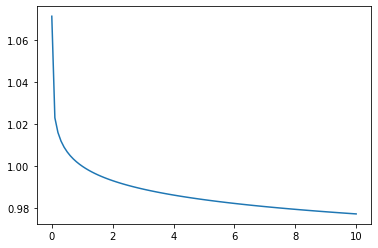

In [156]:
#
x=np.linspace(0.001,10,100)
y=x**(-0.01)
plt.plot(x,y)






## 3. Hypothèse Logarithmique
$y=a.ln(x)+ b$

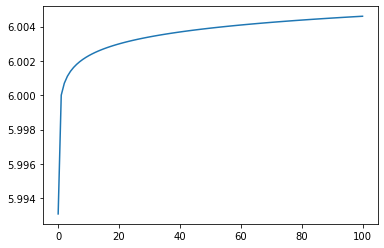

In [162]:
x=np.linspace(0.001,100,100)
y=0.001*np.log(x)+6
plt.plot(x,y)

## 4. Hypothèse polynomial
$y=a+bx+ cx^{2}+ dx^{3} + ...$

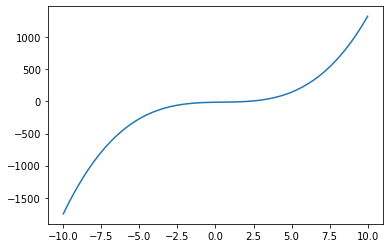

In [152]:
x=np.linspace(-10,10,100)
y=-6+4*x-2*x**2+1.5*x**3-6
plt.plot(x,y)

## 4. Evaluation des pérformances d'un modèle
En général, on préfère un modèle qui est globalement plus près des vraies valeurs à un modèle presque exact pour quelques points.

Pour quantifier cette notion de « plus près des vraies valeurs », il existe plusieur méthode: 
#### 1. somme des carrés des résidus (RSS)
$$RSS=\sum_{i=1}^{m}(h(x_{i})-y_{i})^2$$
Le problème de la RSS, c'est qu'elle est plus grande les données. Pour cette raison, nous allons la normaliser par le nombre m de points dans le jeu de test. On obtient ainsi

#### 2. l'erreur quadratique moyenne (MSE, pour Mean Squared Error).
$$MSE=\frac{1}{m}\sum_{i=1}^{m}(h(x_{i})-y_{i})^2$$
Pour se ramener à l'unité de y , on peut prendre la racine de la MSE. On obtient ainsi 

#### 3. RMSE, ou Root Mean Squared Error.
$$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(y_{i}-h(x_{i}))^2}$$
$y=4 , \hat{y}=104 \rightarrow$ RMSE= 100

$y=3000 , \hat{y}=3100 \rightarrow$ RMSE= 100
**!!!**

Pour prendre cela en compte, on peut passer les valeurs prédites et les vraies valeurs au **log** avant de calculer la RMSE. On obtient ainsi 

#### 4. la RMSLE (Root Mean Squared Log Error)
$$RMSLE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(log(y_{i}+1)-log(h(x_{i})+1))^2}$$

#### 5. l'erreur carrée relative (Relative Squared Error)
Dans un problème de prédiction des prix de vente
- pour un ordinateur
$$y=4000(DH) , \hat{y}=5000(DH) \rightarrow RMSE= 1000 DH $$

- pour une voiture
$$y=400000(DH) , \hat{y}=401000(DH) \rightarrow RMSE= 1000 DH $$


$$RSE=\frac{\sum_{i=1}^{m}(h(x_{i})-y_{i})^2}{\sum_{i=1}^{m}(y_{i}-\overline{y})^2}$$
#### 6. Le coefficient de détermination $R^{2}$

Le coefficient de détermination $R^{2}=1-RSE$, nous indique à quel point les valeurs prédites sont corrélées aux vraies valeurs. Si les prédictions sont fortement anti-corrélées aux vraies valeurs, le coefficient de détermination sera élevé aussi.

**corrélation de Pearson**
$$ R=\frac{\sum_{i=1}^{m}(y_{i}-\overline{y})(h(x_{i})-\overline{h(x)})}{\sqrt{\sum_{i=1}^{m}(y_{i}-\overline{y})^2}\sqrt{\sum_{i=1}^{m}(h(x_{i})-\overline{h(x)})^2}} $$
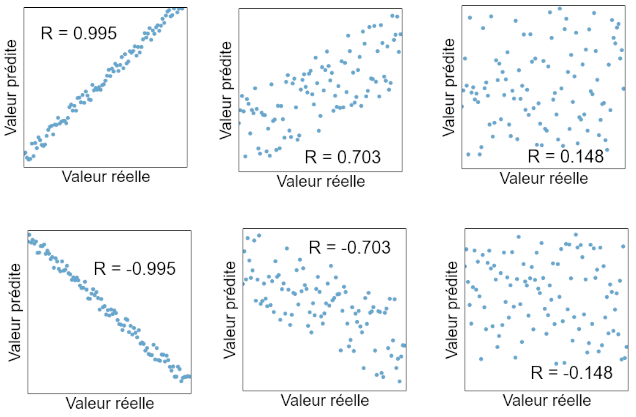
**Attention au cas d'anti-corrélation (R<0) !!!**

## 5. Exercice
Les valeures ci-dessous presente le prix de revente d'un orinateur apès chaque année d'utilisation
x=[0,1,2,3,4,5]
y=[4800,3400,2420,2000,1760,1723]
1. Calculer la corrélation linèaire entre:
- x et y
- ln(x) et y
- x et ln(y)
- ln(x) et ln(y)
2. Quel type d'hypothèse choisir pour ce problème de régression
3. Ecrire un scripte pour estimer les paramètres des 4 types d'hypothèses
4. Evaluer les performances de chaque modèle
3. C'est quoi le prix de vente de cet ordinateur après 20ans

In [3]:
x=np.array([0.001,1,2,3,4,5]) 
y=np.array([4800,3400,2420,2000,1760,1723])
data=pd.DataFrame([x,y,np.log(x),np.log(y)],index=["x","y","lnx","lny"]).T
data.corr()

,x,y,lnx,lny
x,1.000000,-0.916452,0.772777,-0.954706
y,-0.916452,1.000000,-0.932600,0.990880
lnx,0.772777,-0.932600,1.000000,-0.881684
lny,-0.954706,0.990880,-0.881684,1.000000


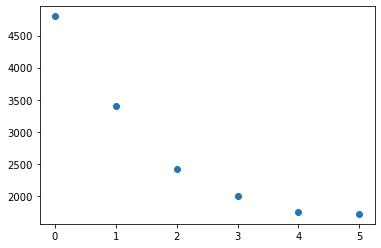

In [176]:
plt.scatter(x,y)

D'après la matrice de corrélation, on remarque que la corrélation la forte est entre  ln(y) et x. Donc le modèle le plus aproprié est:

$$h(x)=be^{ax}$$

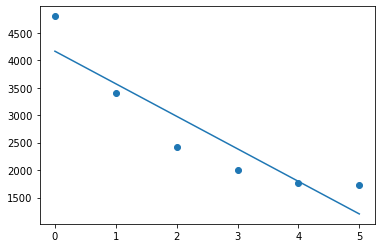

In [213]:
## Aproximation avec un modèle linèaire y=ax+b
X=np.stack((np.ones(len(x)),x)).T
wl=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
xx=np.linspace(0.001,6,100)
yl=wl[0]+wl[1]*x
plt.scatter(x,y)
plt.plot(x,yl)

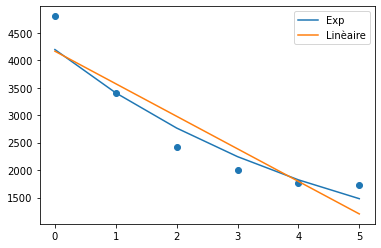

In [214]:
## Aproximation avec un modèle exponontiel y=b.exp(ax)
X=np.stack((np.ones(len(x)),x)).T
we=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(np.log(y))
xx=np.linspace(0.001,6,100)
ye=np.exp(we[0])*np.exp(we[1]*x)
plt.scatter(x,y)
plt.plot(x,ye,label="Exp")
plt.plot(x,yl,label="Linèaire")
plt.legend()

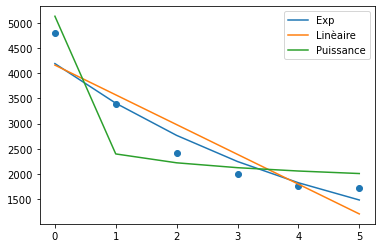

In [215]:
## Aproximation avec un modèle exponontiel y=b*(x**a)
X=np.stack((np.ones(len(x)),np.log(x))).T
wp=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(np.log(y))
yp=np.exp(wp[0])*x**wp[1]
plt.scatter(x,y)
plt.plot(x,ye,label="Exp")
plt.plot(x,yl,label="Linèaire")
plt.plot(x,yp,label="Puissance")
plt.legend()

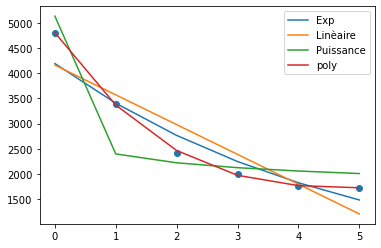

In [224]:
## Aproximation avec un modèle exponontiel y=b*(x**a)
X=np.stack((np.ones(len(x)),x,x**2,x**3)).T
wpl=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
plt.scatter(x,y)
plt.plot(x,ye,label="Exp")
plt.plot(x,yl,label="Linèaire")
plt.plot(x,yp,label="Puissance")
ypl=wpl[0]+wpl[1]*x+ wpl[2]*x**2+ wpl[3]*x**3
plt.plot(x,ypl,label="poly")
plt.legend()

In [232]:
#RSE
av=np.average(y)
rse=((y-yl).dot(y-yl))/(y-av).dot(y-av)
print("R linèaire:",1-rse)

rse=((y-ye).dot(y-ye))/(y-av).dot(y-av)
print("R Exp:",1-rse)


rse=((y-yp).dot(y-yp))/(y-av).dot(y-av)
print("R Puissance:",1-rse)

rse=((y-ypl).dot(y-ypl))/(y-av).dot(y-av)
print("R Poly:",1-rse)

R linèaire: 0.8398850131458755
R Exp: 0.9164852632759138
R Puissance: 0.8161390907970792
R Poly: 0.9994740209410092


In [227]:
#Prediction 
x=9
y=wpl[0]+wpl[1]*x+ wpl[2]*x**2+ wpl[3]*x**3
print("prix après 10ans:",y)

prix après 10ans: 704.0220236359801
